In [ ]:
!pip install git+https://github.com/cosmoquester/spiking-neural-network.git matplotlib

In [2]:
from snn.units import Neuron
from snn.configs import NeuronConfig
from snn.input import RandomStimulator
from snn.layers import FeedForward
import numpy as np

## Initialize Neuron

In [3]:
num_presynaptic_neurons = 3
num_postsynaptic_neurons = 2
cfg = NeuronConfig(
    rest_potential=0.0,
    min_potential = -1.0,
    threshold_potential = 25.0,
    excitatory_potential = 4.0,
    leakage_factor = 0.25,
    rest_period = 40
)
feedforward = FeedForward(cfg, num_presynaptic_neurons, num_postsynaptic_neurons)

## Simulation

In [4]:
total_time_step = 500
input_potentials = []
neuron_potentials = []
output_spikes = []
weighted_potentials = []
time = range(total_time_step)

for input_potential in RandomStimulator([num_presynaptic_neurons], timestep=total_time_step):
  spike, neuron_potential, weighted_potential = feedforward(input_potential)

  input_potentials.append(input_potential)
  neuron_potentials.append(neuron_potential)
  output_spikes.append([int(s) for s in spike])
  weighted_potentials.append(weighted_potential)

input_potentials = np.array(input_potentials)
neuron_potentials = np.array(neuron_potentials)
output_spikes = np.array(output_spikes)
weighted_potentials = np.array(weighted_potentials)

In [5]:
import matplotlib.pyplot as plt

## Input

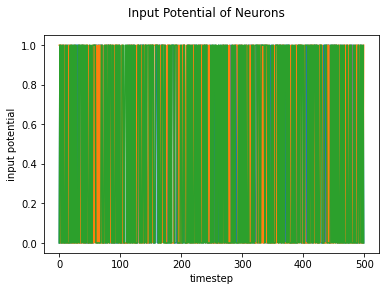

In [6]:
plt.plot(time, input_potentials)
plt.suptitle("Input Potential of Neurons")
plt.xlabel("timestep")
plt.ylabel("input potential")
plt.show()

## Neuron Potential

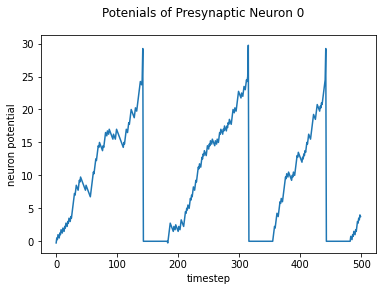

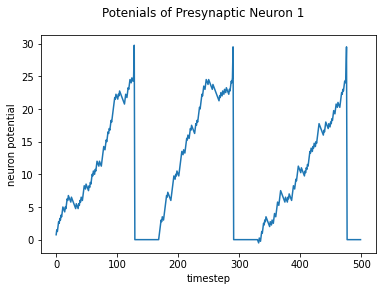

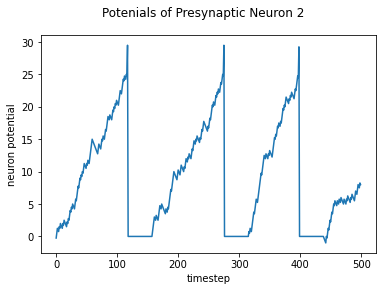

In [7]:
for i, neuron_potential in enumerate(neuron_potentials.T):
  plt.plot(time, neuron_potential)
  plt.suptitle(f"Potenials of Presynaptic Neuron {i}")
  plt.xlabel("timestep")
  plt.ylabel("neuron potential")
  plt.show()


## Neuron Spike

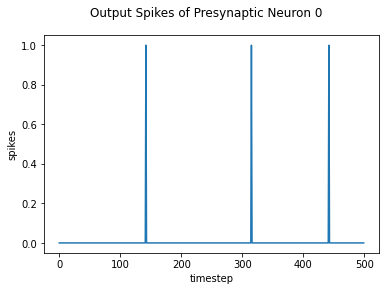

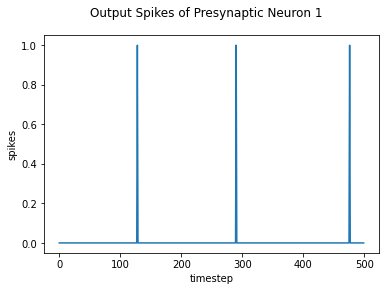

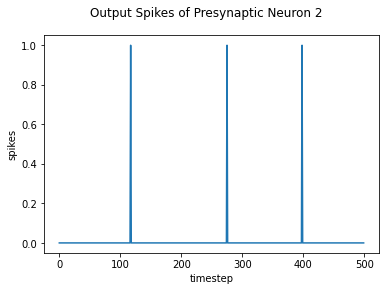

In [8]:
for i, output_spike in enumerate(output_spikes.T):
  plt.plot(time, output_spike)
  plt.suptitle(f"Output Spikes of Presynaptic Neuron {i}")
  plt.xlabel("timestep")
  plt.ylabel("spikes")
  plt.show()

# Weighted Output Potentials by Synapses

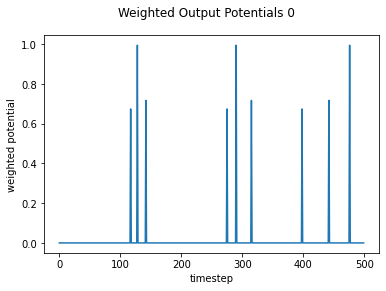

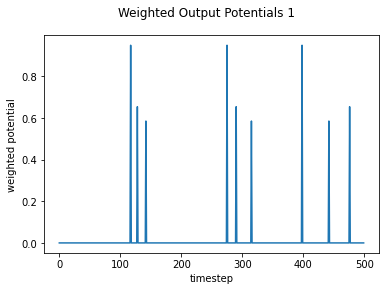

In [9]:
for i, weighted_potential in enumerate(weighted_potentials.T):
  plt.plot(time, weighted_potential)
  plt.suptitle(f"Weighted Output Potentials {i}")
  plt.xlabel("timestep")
  plt.ylabel("weighted potential")
  plt.show()